# **Assignment 3 - Building a Convolutional Neural Network for Image Classification**

### Use of GPUs on Colab
Please run the python code in Google Colab. The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability. You can request one by doing the following:

Rumtime → Change runtime type → T4 GPU


## **Objective**
This assignment focuses on understanding, implementing, and improving a **Convolutional Neural Network (CNN)** architecture to solve image classification problems across different datasets. The task is divided into three parts:

-	Implement the original LeNet-5 architecture to classify handwritten digits from the MNIST dataset
-	Apply the LeNet-5 architecture to a more complex dataset to evaluate its performance on colorful, high-variance natural images compared to simple grayscale digits.
-	Fine-tune the CNN model and propose strategies to enhance its performance on the flower classification task through optimization and architectural improvements.


**Carefully read the instructions provided in the text cells and comments. Respond to all questions using text cells, supported by relevant Python code where appropriate.**

## **Introduction to the MNIST Dataset and LeNet-5**
- The MNIST dataset (Modified National Institute of Standards and Technology) is widely recognized as one of the most important benchmarks in machine learning and computer vision. It comprises 70,000 grayscale images of handwritten digits (0-9), with 60,000 images allocated for training and 10,000 images for testing. Each image has a uniform size of 28x28 pixels, making it ideal for developing and testing image classification algorithms. The dataset's simplicity and well-structured format have made it a popular choice for researchers and practitioners alike, serving as a standard for evaluating new methodologies in digit recognition.

- One of the pioneering architectures designed for image classification tasks is LeNet-5, developed by Yann LeCun et al. in 1998. LeNet-5 is a convolutional neural network specifically tailored for handwritten digit recognition. It consists of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract features from input images and classify them into one of ten categories (digits 0-9).

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# **Data Expolore**

In [ ]:
# The data, split between train and test sets:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('x_train shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')
print(train_images[0].shape, 'image shape')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape


In [ ]:
# no. of classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Question 1: What is the distribution of each digit (0-9) in both the training and test sets? Write relevant python code below to answer the question



In [ ]:
# Answer for Question 1




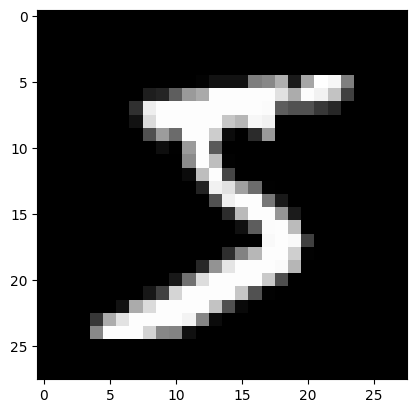

In [ ]:
#let’s see one sample of the dataset
plt.imshow(train_images[0], cmap='gray')

In [ ]:
# self-defined function showing image pixel values of an image

import numpy as np

def img_pixel_superimpose(img, ax):
    w, h = img.shape
    color_map = plt.cm.get_cmap('gray_r')  # gray_reversed
    ax.imshow(img, cmap='gray')
    for x in range(w):
        for y in range(h):
            color = color_map(img[x][y])
            ax.annotate(str(img[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center',
                        color=color)
            plt.axis(False)

/tmp/ipython-input-3335935714.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('gray_r')  # gray_reversed


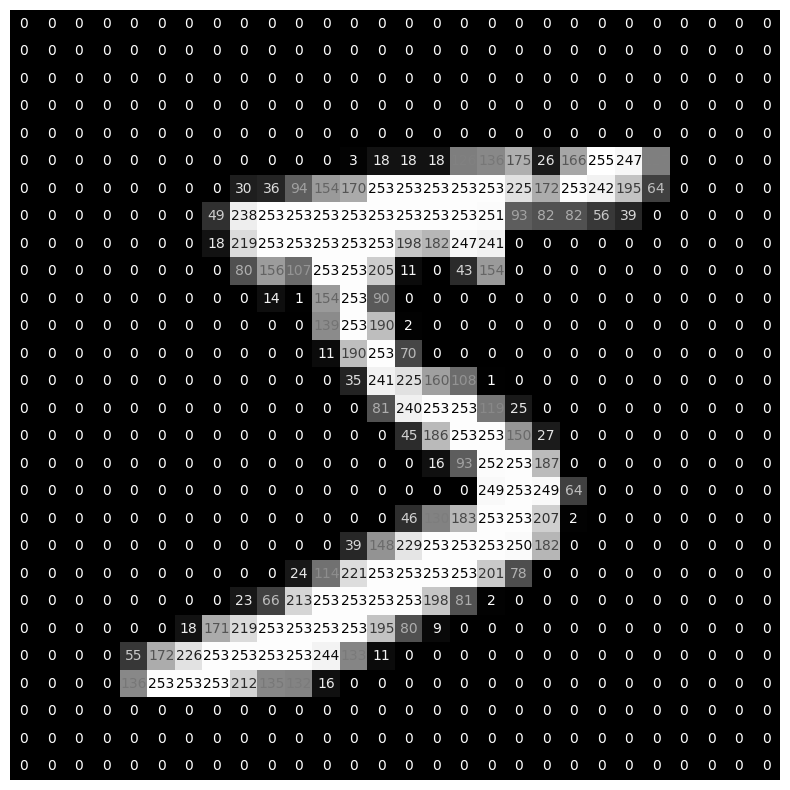

In [ ]:
# plot the image with pixel values

fig = plt.figure(figsize = (10,10))
ax0 = fig.add_subplot(1, 1, 1)

img_pixel_superimpose(train_images[0], ax0)

In [ ]:
# create a list of class names
class_names = ['0 - zero','1 - one','2 - two','3 - three','4 - four','5 - five','6 - six','7 - seven','8 - eight','9 - nine']

<Figure size 1600x400 with 0 Axes>

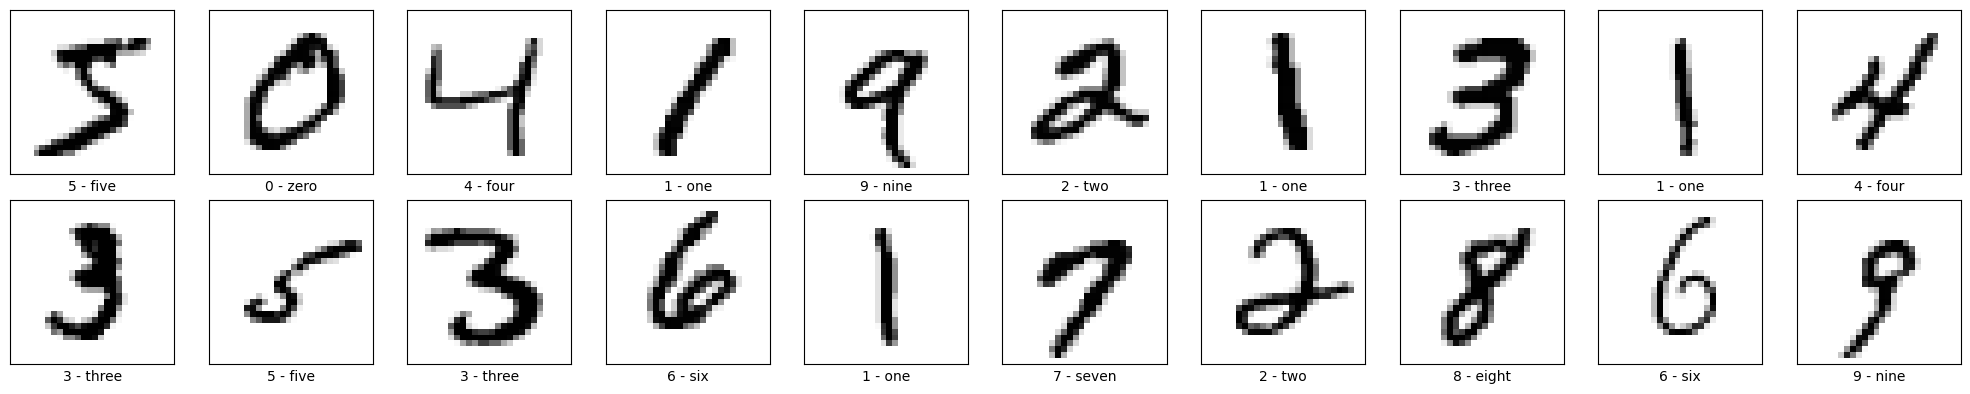

In [ ]:
# Display multiple sample images together to get a better overall sense of the dataset.
fig = plt.figure(figsize=(16, 4))
rows, cols = 2, 10

fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
for i in range(rows*cols):
    ax = axes[i//cols, i%cols]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.imshow(train_images[i], cmap=plt.cm.binary)       # Displays the i-th image in the subplot using a binary colormap (black and white)
    ax.set_xlabel(class_names[train_labels[i]])   # show the class name below the image

plt.tight_layout()
plt.show()

### Question 2: What are the pixel value ranges for the images? (e.g., minimum and maximum pixel values) What are the numbers representing? Write relevant python code below to answer the question.

In [ ]:
# Answer for Question 2




# **Data Transform**

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = to_categorical(train_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

In [ ]:
# Add a new axis
x_train = train_images[:, :, :, np.newaxis]
x_test = test_images[:, :, :, np.newaxis]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape


In the data preprocessing stage, we normalize (scale) the pixel intensities down to the 0-1 range by dividing by 255.

### Question 3: Write code to normalize (scale) pixel values in an image dataset. Explain why normalizing pixel values is important. When labels are converted to categorical format, what does the representation look like? Finally, why is it necessary to add an additional axis to the existing image dimensions?


In [ ]:
# Write your code below
# Normalize (scale) the datasets






Answer for Question 3: (double-click to write your answer)

Below functions are defined for evaluation of training results.

In [ ]:
# plot the accuracy chart
def plot_performance(training_results):
  metric_df = pd.DataFrame(training_results.history)
  metric_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
  plt.grid(True)

In [ ]:
# set up the figure
def plot_prediction(prediction, images, labels, class_names, image_shape=(28,28)):
  fig = plt.figure(figsize=(15, 7))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

  # plot the images: each image is 28x28 pixels
  for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i,:].reshape(image_shape),cmap=plt.cm.gray_r if len(image_shape) == 2 else plt.cm.jet, interpolation='nearest')

    if np.argmax(prediction[i]) == np.argmax(labels[i]):
      # label the image with the blue text
      ax.text(0, 7, class_names[np.argmax(prediction[i])], color='blue')
    else:
      # label the image with the red text
      ax.text(0, 7, class_names[np.argmax(prediction[i])], color='red')

# **LeNet-5 Architecture**

In this step, you will implement the [LeNet-5](https://en.wikipedia.org/wiki/LeNet#/media/File:LeNet-5_architecture.svg) architecture. You can either follow the approach demonstrated during the lab using the `.add()` method to build the model step by step, or use the [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) API  by passing a list of layers *directly*.

The goal is to replicate the original design introduced by Yann LeCun, which consists of alternating convolutional and pooling layers followed by fully connected layers.

Follow the instructions to build the model:

- 1st Convolution layer:
  - Conv2D with 6 filters, a kernel size of (5, 5), stride (1, 1), and tanh activation.
  - Set input_shape to match your training data.  
  - Use padding="same" to preserve spatial dimensions.

- Add an average pooling layer:
  - AveragePooling2D with a pool size of (2, 2) and stride (2, 2).

- 2nd convolutional layer:
  - Use 16 filters, kernel size (5, 5), stride (1, 1), activation tanh.
  - padding="valid".

- Add another average pooling layer:

  - Same configuration as before.

- Flatten the output to convert the 2D feature maps into a 1D vector.

- Add fully connected layers:

  - 1st dense layer with 120 units and tanh activation.
  - 2st dense layer with 84 units and tanh activation.

- Add the output layer:
  - Use Dense(nb_classes, activation='softmax') for classification.


In [ ]:
# Write your code below

input_shape =
nb_classes =

model_LeNet = tf.keras.Sequential([









])

Now, Compile the model:

- Use optimizer='adam'.
- Set the loss function based on your label format.
- Include metrics=['accuracy'].

Explore [CategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) and [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy)

In [ ]:
# Write your code below






### Question 4: What is the difference between these two loss function settings, and which one is appropriate for this case?

Answer for Question 4: (double-click to write your answer)

### Question 5: Use the `.summary()` method to display the model architecture and the number of parameters in each layer. For every layer, explain with calculation steps how the parameter count is calculated.

In [ ]:
# Write your code below




Answer for Question 5: (double-click to write your answer)

Train the model for 20 epochs and use the validation set to monitor potential overfitting issues.

In [ ]:
# Write your code below

model_output =






Use the self-defined functions `plot_performance` and `plot_prediction` to visualize the training results and prediction outputs through charts and images.

## Question 6: Provide a thorough report of your observations, including an evaluation of the model’s performance and any insights gained from the visualizations.

In [ ]:
# Write your code below





Answer for Question 6: (double-click to write your answer)

# **TF Flowers Dataset**
The TF Flowers dataset is a collection of flower images commonly used for image classification tasks. It contains photographs of five different flower species: daisy, dandelion, roses, sunflowers, and tulips. The images vary in size, color, and background complexity, making the dataset suitable for testing models on real-world, high-variance image data. This dataset is available through TensorFlow Datasets (tfds) and is often used to demonstrate transfer learning, data augmentation, and fine-tuning techniques in computer vision.

# **Data Expolore**

## Question 7: What is the proportion of the data split, and how many samples are included in each subset after splitting? How many classes are in the dataset, what are their names, and how are the labels represented and stored?


Answer for Question 7: (double-click to write your answer)

In [ ]:
# Load the TF Flowers dataset from TensorFlow Datasets
import tensorflow_datasets as tfds

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
# Complete the code below
# How many samples are included in each subset?

print(f"Number of training samples: {}")
print(f"Number of validation samples: {}")
print(f"Number of test samples: {}")

In [ ]:
flower_class_names = metadata.features['label'].names
flower_class_names

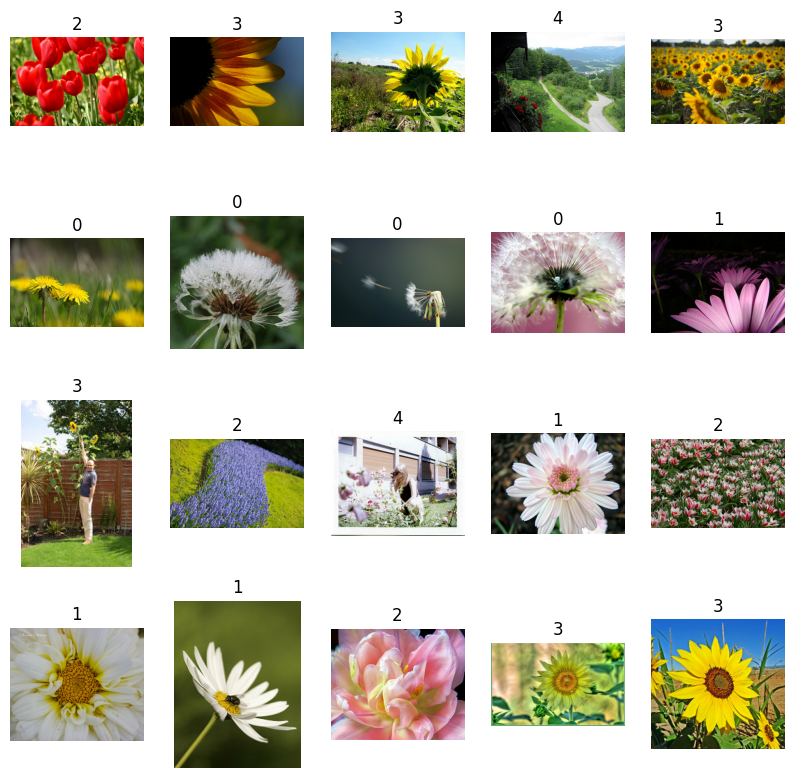

In [ ]:
# Visualize the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(20)):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.title(f"{int(label)} - {flower_class_names[int(label)]}")
    plt.axis("off")


## Question 8: After observing the plotted images, what issues can you identify, and what steps should be taken to address them? Explain the data preprocessing process required for this case.

Answer for Question 8: (double-click to write your answer)

In [ ]:
# resize the images
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
# transform the datasets to numpy array
train_images = np.array([images for images, labels in train_ds])
val_images = np.array([images/255 for images, labels in val_ds])
test_images = np.array([images/255 for images, labels in test_ds])

train_labels = np.array([labels for images, labels in train_ds])
val_labels = np.array([labels for images, labels in val_ds])
test_labels =np.array([labels for images, labels in test_ds])

In [ ]:
# write your code below
# normalization
train_images_norm =
val_images_norm =
test_images_norm =


Implement the LeNet-5 architecture to build a classification model. You may reuse the code from the previous step with **any necessary adjustments**. After building the model, compile it, train it, and carefully observe the results.

In [ ]:
# Write your code below
input_shape =
num_classes =

model_flowers =
















/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Question 9: Report your observations on the training results and compare them with the model built on MNIST. Explain the differences in performance, identify the causes of these issues, and propose solutions to address them. You will implement your suggested improvements in the next section.

Answer for Question 9: (double-click to write your answer)

# Model Fine-Tuning and Performance Improvement

In this section, you are encouraged to implement any strategies you have proposed to improve the model’s performance. These strategies may include techniques covered in the course or methods beyond the scope of the lectures.

Regardless of the approach you choose, you must clearly explain the rationale behind your method, describe the steps taken, and justify why it is expected to enhance the model’s accuracy or generalization.

Your explanation should demonstrate a solid understanding of the problem and the reasoning behind your solution.

Only include the final version of your model and training results in the code cells below. In your report, provide a brief but clear elaboration of the fine-tuning milestones, explaining what changes were made and why.



In [ ]:
# Write your code below









## Question 10: Summarize the fine-tuning process and the improvements you achieved. Clearly explain the rationale behind your chosen approach, the steps you took, and how these changes impacted the model’s performance. Include observations from the final training results and provide a brief evaluation of whether your solution addressed the issues identified earlier.


Answer for Question 10: (double-click to write your answer)